# Business case

Variable -Name	-RoleType
Class	-Target-	Categorical
Age-	Feature	-Integer
Sex	-Feature-	Categorical
Steroid	-Feature-	Categorical
Antivirals	-Feature-	Categorical
Fatigue	-Feature-	Categorical
Malaise	-Feature-	Categorical
Anorexia	-Feature-	Categorical
Liver Big	-Feature-	Categorical
Liver Firm	-Feature-	Categorical
		
Spleen Palpable-	Feature	-Categorical
Spiders	-Feature-	Categorical
Ascites	-Feature-	Categorical
Varices	-Feature	-Categorical
Bilirubin	-Feature-	Continuous
Alk Phosphate	-Feature-	Integer
Sgot-	Feature	-Integer
Albumin	-Feature-	Integer
Protime	-Feature-	Integer
Histology	-Feature-	Integer


Data
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 2 classes:

* 0 -Live
* 1 -Die



**DataSet Link** ----> https://archive.ics.uci.edu/dataset/46/hepatitis

# Business task

To build an effective machine learning model to classify fetal health in order to prevent child and maternal mortality.

# Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

# Loading the dataset

In [2]:
df=pd.read_csv('hepatitis.csv')


In [3]:
df.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology,Class
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1,2
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1,2
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1,2
3,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1,2
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1,2


In [4]:
df.shape

(155, 20)

In [5]:
df['Class'] = df['Class'].replace(2, 0)

# Overview and statistical summary

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              155 non-null    int64  
 1   Sex              155 non-null    int64  
 2   Steroid          154 non-null    float64
 3   Antivirals       155 non-null    int64  
 4   Fatigue          154 non-null    float64
 5   Malaise          154 non-null    float64
 6   Anorexia         154 non-null    float64
 7   Liver Big        145 non-null    float64
 8   Liver Firm       144 non-null    float64
 9   Spleen Palpable  150 non-null    float64
 10  Spiders          150 non-null    float64
 11  Ascites          150 non-null    float64
 12  Varices          150 non-null    float64
 13  Bilirubin        149 non-null    float64
 14  Alk Phosphate    126 non-null    float64
 15  Sgot             151 non-null    float64
 16  Albumin          139 non-null    float64
 17  Protime         

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,155.0,41.200000,12.565878,7.0,32.00,39.0,50.00,78.0
Sex,155.0,1.103226,0.305240,1.0,1.00,1.0,1.00,2.0
Steroid,154.0,1.506494,0.501589,1.0,1.00,2.0,2.00,2.0
Antivirals,155.0,1.845161,0.362923,1.0,2.00,2.0,2.00,2.0
Fatigue,154.0,1.350649,0.478730,1.0,1.00,1.0,2.00,2.0
Malaise,154.0,1.603896,0.490682,1.0,1.00,2.0,2.00,2.0
Anorexia,154.0,1.792208,0.407051,1.0,2.00,2.0,2.00,2.0
Liver Big,145.0,1.827586,0.379049,1.0,2.00,2.0,2.00,2.0
Liver Firm,144.0,1.583333,0.494727,1.0,1.00,2.0,2.00,2.0
Spleen Palpable,150.0,1.800000,0.401340,1.0,2.00,2.0,2.00,2.0


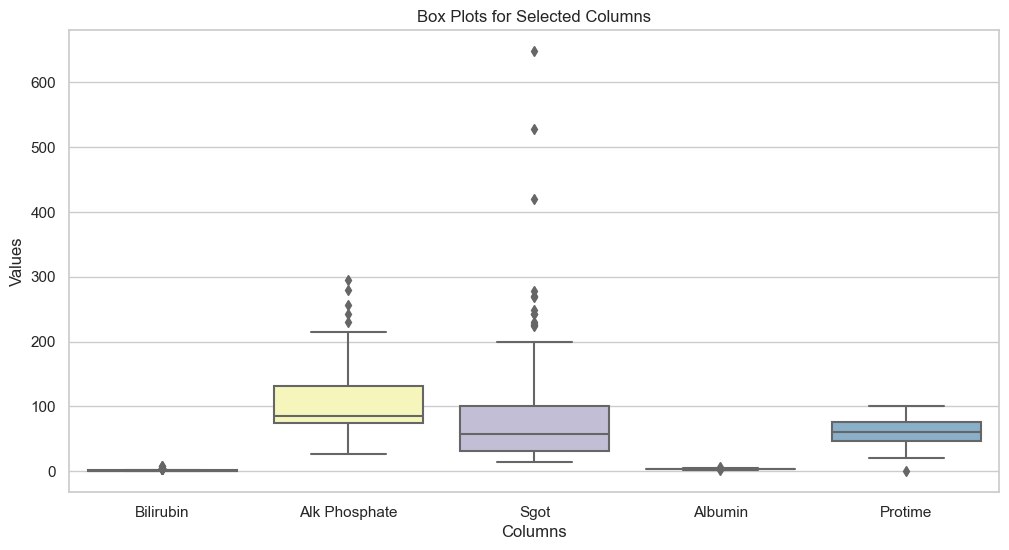

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
columns_to_plot = ['Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']

# Create a subset DataFrame with the specified columns
subset_df = df[columns_to_plot]

# Set up the plotting environment
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Draw box plots for each column
sns.boxplot(data=subset_df, palette="Set3")

# Set plot labels and title
plt.title("Box Plots for Selected Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

# Show the plot
plt.show()


# Data cleaning

In [9]:
# to check for null values
df.isna().sum()

Age                 0
Sex                 0
Steroid             1
Antivirals          0
Fatigue             1
Malaise             1
Anorexia            1
Liver Big          10
Liver Firm         11
Spleen Palpable     5
Spiders             5
Ascites             5
Varices             5
Bilirubin           6
Alk Phosphate      29
Sgot                4
Albumin            16
Protime            67
Histology           0
Class               0
dtype: int64

In [10]:
df.columns

Index(['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia',
       'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders', 'Ascites',
       'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime',
       'Histology', 'Class'],
      dtype='object')

# filling the missing values

In [11]:
import pandas as pd
# Assuming df is your DataFrame
columns_to_fill = ['Steroid', 'Fatigue', 'Malaise', 'Anorexia', 
                   'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders', 
                   'Ascites', 'Varices']

# Fill missing values in specified columns with the mode
for column in columns_to_fill:
    mode_value = df[column].mode()[0]  # Calculate mode
    df[column].fillna(mode_value, inplace=True)

# Display the modified DataFrame


In [12]:
import pandas as pd

# Assuming df is your DataFrame
columns_to_fill_median = ['Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']

# Fill missing values in specified columns with the median
for column in columns_to_fill_median:
    median_value = df[column].median()  # Calculate median
    df[column].fillna(median_value, inplace=True)

# Display the modified DataFrame


In [13]:
df.isna().sum()

Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver Big          0
Liver Firm         0
Spleen Palpable    0
Spiders            0
Ascites            0
Varices            0
Bilirubin          0
Alk Phosphate      0
Sgot               0
Albumin            0
Protime            0
Histology          0
Class              0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              155 non-null    int64  
 1   Sex              155 non-null    int64  
 2   Steroid          155 non-null    float64
 3   Antivirals       155 non-null    int64  
 4   Fatigue          155 non-null    float64
 5   Malaise          155 non-null    float64
 6   Anorexia         155 non-null    float64
 7   Liver Big        155 non-null    float64
 8   Liver Firm       155 non-null    float64
 9   Spleen Palpable  155 non-null    float64
 10  Spiders          155 non-null    float64
 11  Ascites          155 non-null    float64
 12  Varices          155 non-null    float64
 13  Bilirubin        155 non-null    float64
 14  Alk Phosphate    155 non-null    float64
 15  Sgot             155 non-null    float64
 16  Albumin          155 non-null    float64
 17  Protime         

There are no null values in the dataset

In [15]:
# Assuming df is your DataFrame
columns_to_convert = ['Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia',
                      'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
                      'Ascites', 'Varices', 'Histology']

# Convert specified columns from float to int
df[columns_to_convert] = df[columns_to_convert].astype(int)

# Display the modified DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              155 non-null    int64  
 1   Sex              155 non-null    int64  
 2   Steroid          155 non-null    int32  
 3   Antivirals       155 non-null    int32  
 4   Fatigue          155 non-null    int32  
 5   Malaise          155 non-null    int32  
 6   Anorexia         155 non-null    int32  
 7   Liver Big        155 non-null    int32  
 8   Liver Firm       155 non-null    int32  
 9   Spleen Palpable  155 non-null    int32  
 10  Spiders          155 non-null    int32  
 11  Ascites          155 non-null    int32  
 12  Varices          155 non-null    int32  
 13  Bilirubin        155 non-null    float64
 14  Alk Phosphate    155 non-null    float64
 15  Sgot             155 non-null    float64
 16  Albumin          155 non-null    float64
 17  Protime         

# EDA

In [16]:
df['Class'].value_counts()

Class
0    123
1     32
Name: count, dtype: int64

About 77.8% of observations are having normal fetal health, 13.8% are having suspect fetal health and 8.2% are pathological

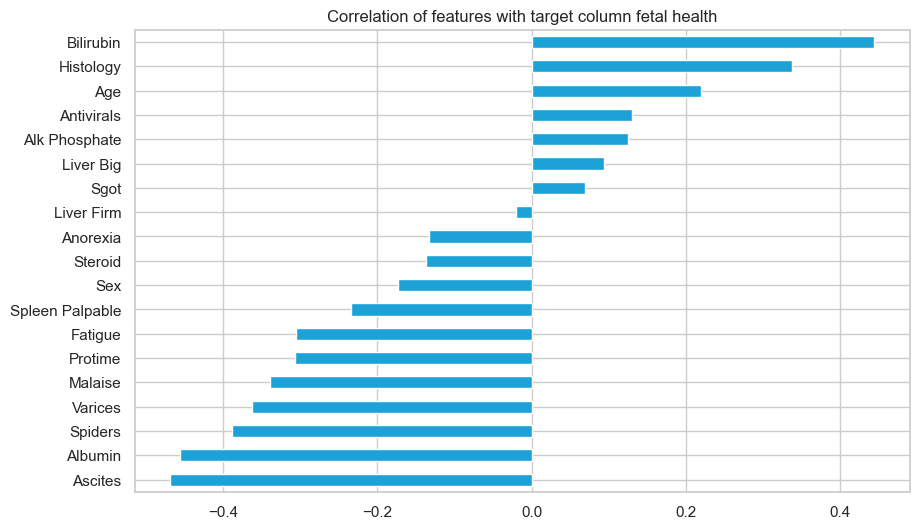

In [17]:
plt.figure(figsize=(10,6),dpi=100)
df.corr()['Class'].sort_values()[:-1].plot(kind='barh',color='#1da2d8')
plt.title('Correlation of features with target column fetal health');

Prolongued_decelerations is highly positively correlated, whereas the accelerations are highly negatively correlated with target column.

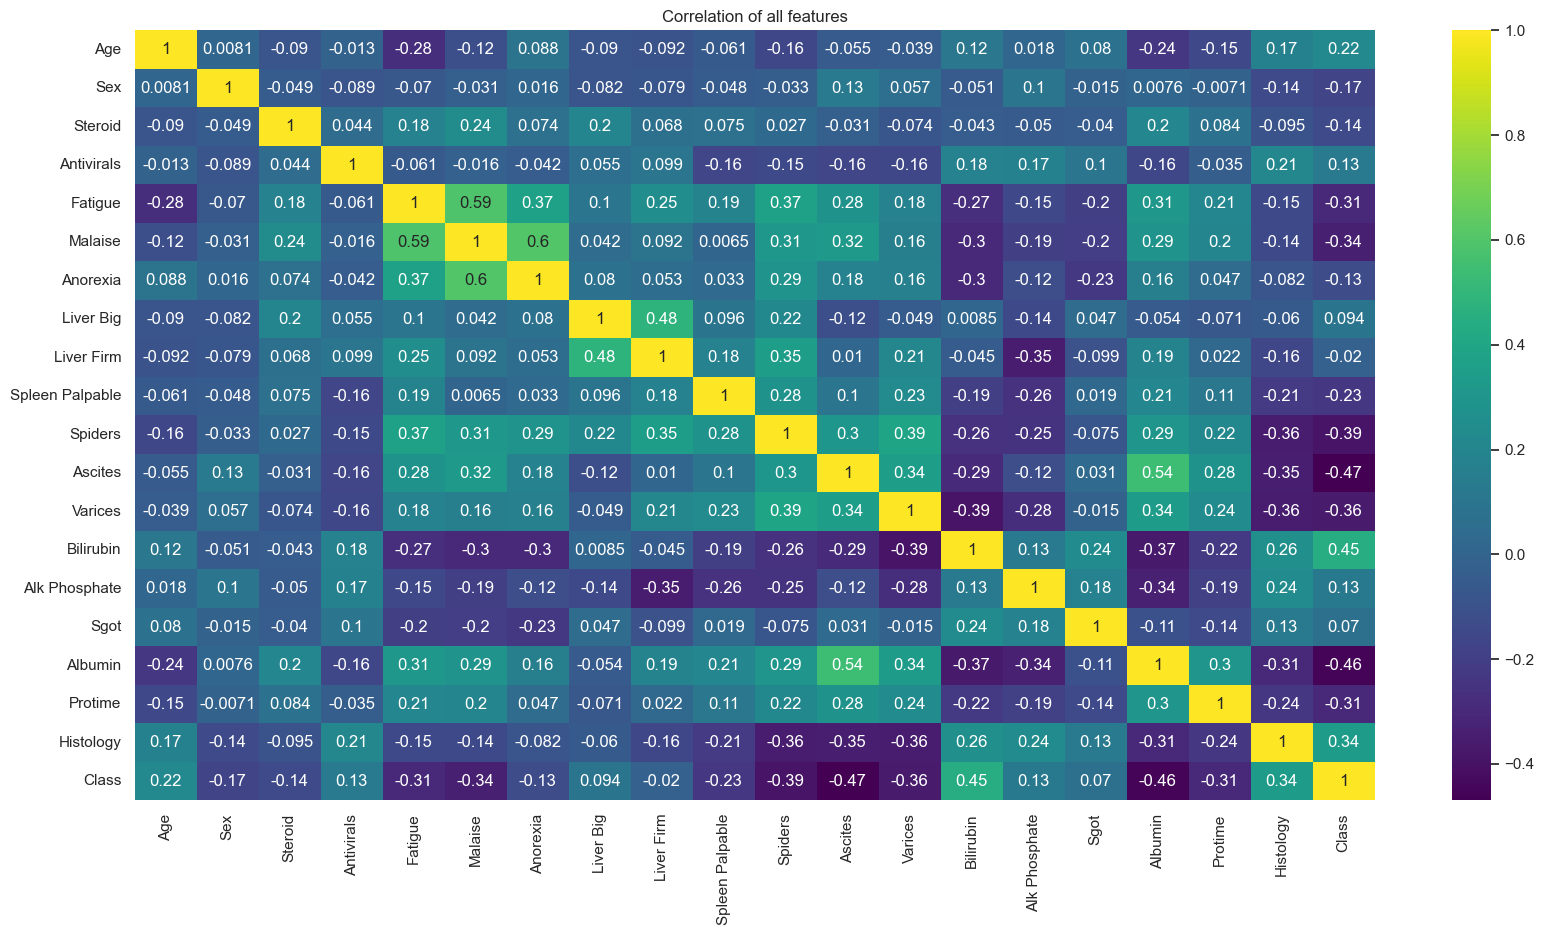

In [18]:
plt.figure(figsize=(20,10),dpi=100)
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.title('Correlation of all features');

Abnormal short term variability for fetal type 3 is relatively higher than 1 and 2.

In [19]:
# df.to_csv('hepatitis_clean.csv',index =False)

# Creating X,y and performing train - test split

In [20]:
X = df.drop('Class',axis=1)
y=df['Class']

In [21]:
import imblearn
from imblearn.over_sampling import SMOTE

ros = SMOTE()  # You need to add parentheses to create an instance
X_oversample, y_oversample = ros.fit_resample(X, y)

print(X_oversample.shape)
print(y_oversample.shape)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_oversample,y_oversample,random_state=1,test_size=0.2)

(246, 19)
(246,)


In [22]:
X_train

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
169,32,1,1,2,1,1,1,2,2,1,1,1,2,7.333641,85.000000,102.420109,2.221848,61.000000,2
159,58,1,1,2,1,1,2,2,2,1,1,2,2,1.078496,85.000000,60.354885,3.901880,55.897748,2
180,50,1,2,2,1,1,1,2,2,2,1,1,1,2.738379,84.351609,31.790223,3.637426,68.461262,1
147,70,1,1,2,1,1,1,2,2,2,2,2,2,1.700000,109.000000,528.000000,2.800000,35.000000,2
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.600000,85.000000,242.000000,3.300000,50.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,38,1,2,2,2,2,2,2,1,2,1,2,1,1.600000,130.000000,140.000000,3.500000,56.000000,2
72,51,1,2,2,1,1,1,2,2,2,2,2,2,0.900000,76.000000,271.000000,4.400000,61.000000,1
140,36,1,1,2,1,1,1,1,1,2,1,2,1,1.700000,295.000000,60.000000,2.700000,61.000000,2
235,40,1,1,1,1,1,2,2,2,2,1,1,2,0.529527,62.147634,69.771613,3.681892,29.295269,2


In [23]:

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [24]:
# decision Tree


DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score

# y_predict = DT.predict(X_test)
print('*'*20)

# prediction
train_pred=DT.predict(X_train)
test_pred= DT.predict(X_test)
print('*'*20)
# accuracy
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))

print('*'*20)
 # cross validation   
score= cross_val_score(DT,X,y,cv=5)
print(score)
print(score.mean())

print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_pred))

print('*'*20)
# Accuracy score
DT_SC = accuracy_score(test_pred,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

print('*'*20)



********************
********************
Train accuracy: 1.0
Test accuracy: 0.9
********************
[0.74193548 0.80645161 0.93548387 0.77419355 0.87096774]
0.8258064516129032
********************
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.92      0.88      0.90        25

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50

********************
90.0% Accurate
********************


In [25]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.92
train accuracy: 1.0
********************
0.8387096774193548
********************
********************
92.0% Accurate


# Xgboost classifier

In [26]:
#  XGBoost

XGB = XGBClassifier()
XGB.fit(X_train, y_train)

# prediction
train_prediction= XGB.predict(X_train)
test_prediction= XGB.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))

print('*'*20)

print(classification_report(y_test,test_prediction))

print('*'*20)


XGB_HSC = accuracy_score(test_prediction,y_test)
print(f"{round(XGB_HSC*100,2)}% Accurate")

********************
test accuracy: 0.92
train accuracy: 1.0
********************
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        25
           1       0.92      0.92      0.92        25

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50

********************
92.0% Accurate


In [27]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(random_state=42)
ada.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= ada.predict(X_train)
test_prediction= ada.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
# from sklearn.model_selection import cross_val_score
# score=cross_val_score(ada,X,Y,cv=5)
# print(score.mean())
print('*'*20)

#  prediction Summary by species
print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
ada_h = accuracy_score(test_prediction,y_test)
print(f"{round(ada_h*100,2)}% Accurate")

********************
********************
test accuracy: 0.9
train accuracy: 1.0
********************
********************
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.92      0.88      0.90        25

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50

********************
90.0% Accurate


In [28]:
from sklearn.ensemble import GradientBoostingClassifier
# random forest

gbc=GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= gbc.predict(X_train)
test_prediction= gbc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
# from sklearn.model_selection import cross_val_score
# score=cross_val_score(gbc,X,Y,cv=5)
# print(score.mean())
print('*'*20)

#  prediction Summary by species
print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
gbc_h = accuracy_score(test_prediction,y_test)
print(f"{round(gbc_h*100,2)}% Accurate")

********************
********************
test accuracy: 0.9
train accuracy: 1.0
********************
********************
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.92      0.88      0.90        25

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50

********************
90.0% Accurate


# logistic regression


In [29]:

# logistic regression

LR = LogisticRegression()
LR.fit(X_train, y_train)


# prediction
train_prediction= LR.predict(X_train)
test_prediction= LR.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(LR,X,y,cv=5)
print(score.mean())
print('*'*20)

print(classification_report(y_test,test_pred))

print('*'*20)


lr_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(lr_HSC*100,2)}% Accurate")

********************
test accuracy: 0.9
train accuracy: 0.9183673469387755
********************


d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

0.832258064516129
********************
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.92      0.88      0.90        25

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50

********************
90.0% Accurate


# K-Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import imblearn
from imblearn.over_sampling import SMOTE

ros = SMOTE()  # You need to add parentheses to create an instance
X_oversample, y_oversample = ros.fit_resample(X, y)

print(X_oversample.shape)
print(y_oversample.shape)

from sklearn.model_selection import train_test_split

Xx_train,Xx_test,yy_train,yy_test = train_test_split(X_oversample,y_oversample,random_state=1,test_size=0.2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xx_train=scaler.fit_transform(Xx_train)
Xx_test= scaler.transform(Xx_test)

# model
knn_model=KNeighborsClassifier()
knn_model.fit(Xx_train,yy_train)

# prediction

test_prediction= knn_model.predict(Xx_test)

# evaluation
print('*'*20)
from sklearn.metrics import accuracy_score
print('Test accuracy:',accuracy_score(yy_test,test_prediction))
print('Train accuracy:',accuracy_score(yy_train,train_prediction))

print('*'*20)
result = confusion_matrix(yy_test, test_prediction)
print("Confusion Matrix:")
print(result)


print('*'*20)
#  prediction Summary by species
print(classification_report(yy_test, test_prediction))


print('*'*20)
# Accuracy score
Knn_SC = accuracy_score(test_prediction,yy_test)
print(f"{round(Knn_SC*100,2)}% Accurate")


(246, 19)
(246,)
********************
Test accuracy: 0.92
Train accuracy: 0.9183673469387755
********************
Confusion Matrix:
[[23  2]
 [ 2 23]]
********************
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        25
           1       0.92      0.92      0.92        25

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50

********************
92.0% Accurate


In [31]:
score = [DT_SC,RF_SC,lr_HSC,Knn_SC,XGB_HSC,ada_h,gbc_h]
Models = pd.DataFrame({
    'Model': ["Decision Tree","Random Forest", "Logistic Regression",'Knn','XGBoost','AdaBoost',"GradientBoostingClassifier"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.92
3,Knn,0.92
4,XGBoost,0.92
0,Decision Tree,0.90
2,Logistic Regression,0.90
5,AdaBoost,0.90
6,GradientBoostingClassifier,0.90


# feature importances

In [32]:

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)

# Get feature importance scores
feature_importances = rfc.feature_importances_

# Get the names of the features from your dataset
imp_feature=pd.DataFrame(index=X.columns,data=feature_importances,columns=['feature importance'])
imp_feature
# Create a DataFrame with feature names and their corresponding importances


,feature importance
Age,0.061035
Sex,0.025153
Steroid,0.023450
Antivirals,0.004610
Fatigue,0.041887
Malaise,0.073505
Anorexia,0.010067
Liver Big,0.007995
Liver Firm,0.018023
Spleen Palpable,0.047739


In [33]:
imp_feature=imp_feature[imp_feature['feature importance']>0.03]
b=imp_feature.sort_values('feature importance')
b.index

Index(['Varices', 'Fatigue', 'Spleen Palpable', 'Alk Phosphate', 'Sgot', 'Age',
       'Protime', 'Malaise', 'Ascites', 'Spiders', 'Albumin', 'Bilirubin'],
      dtype='object')

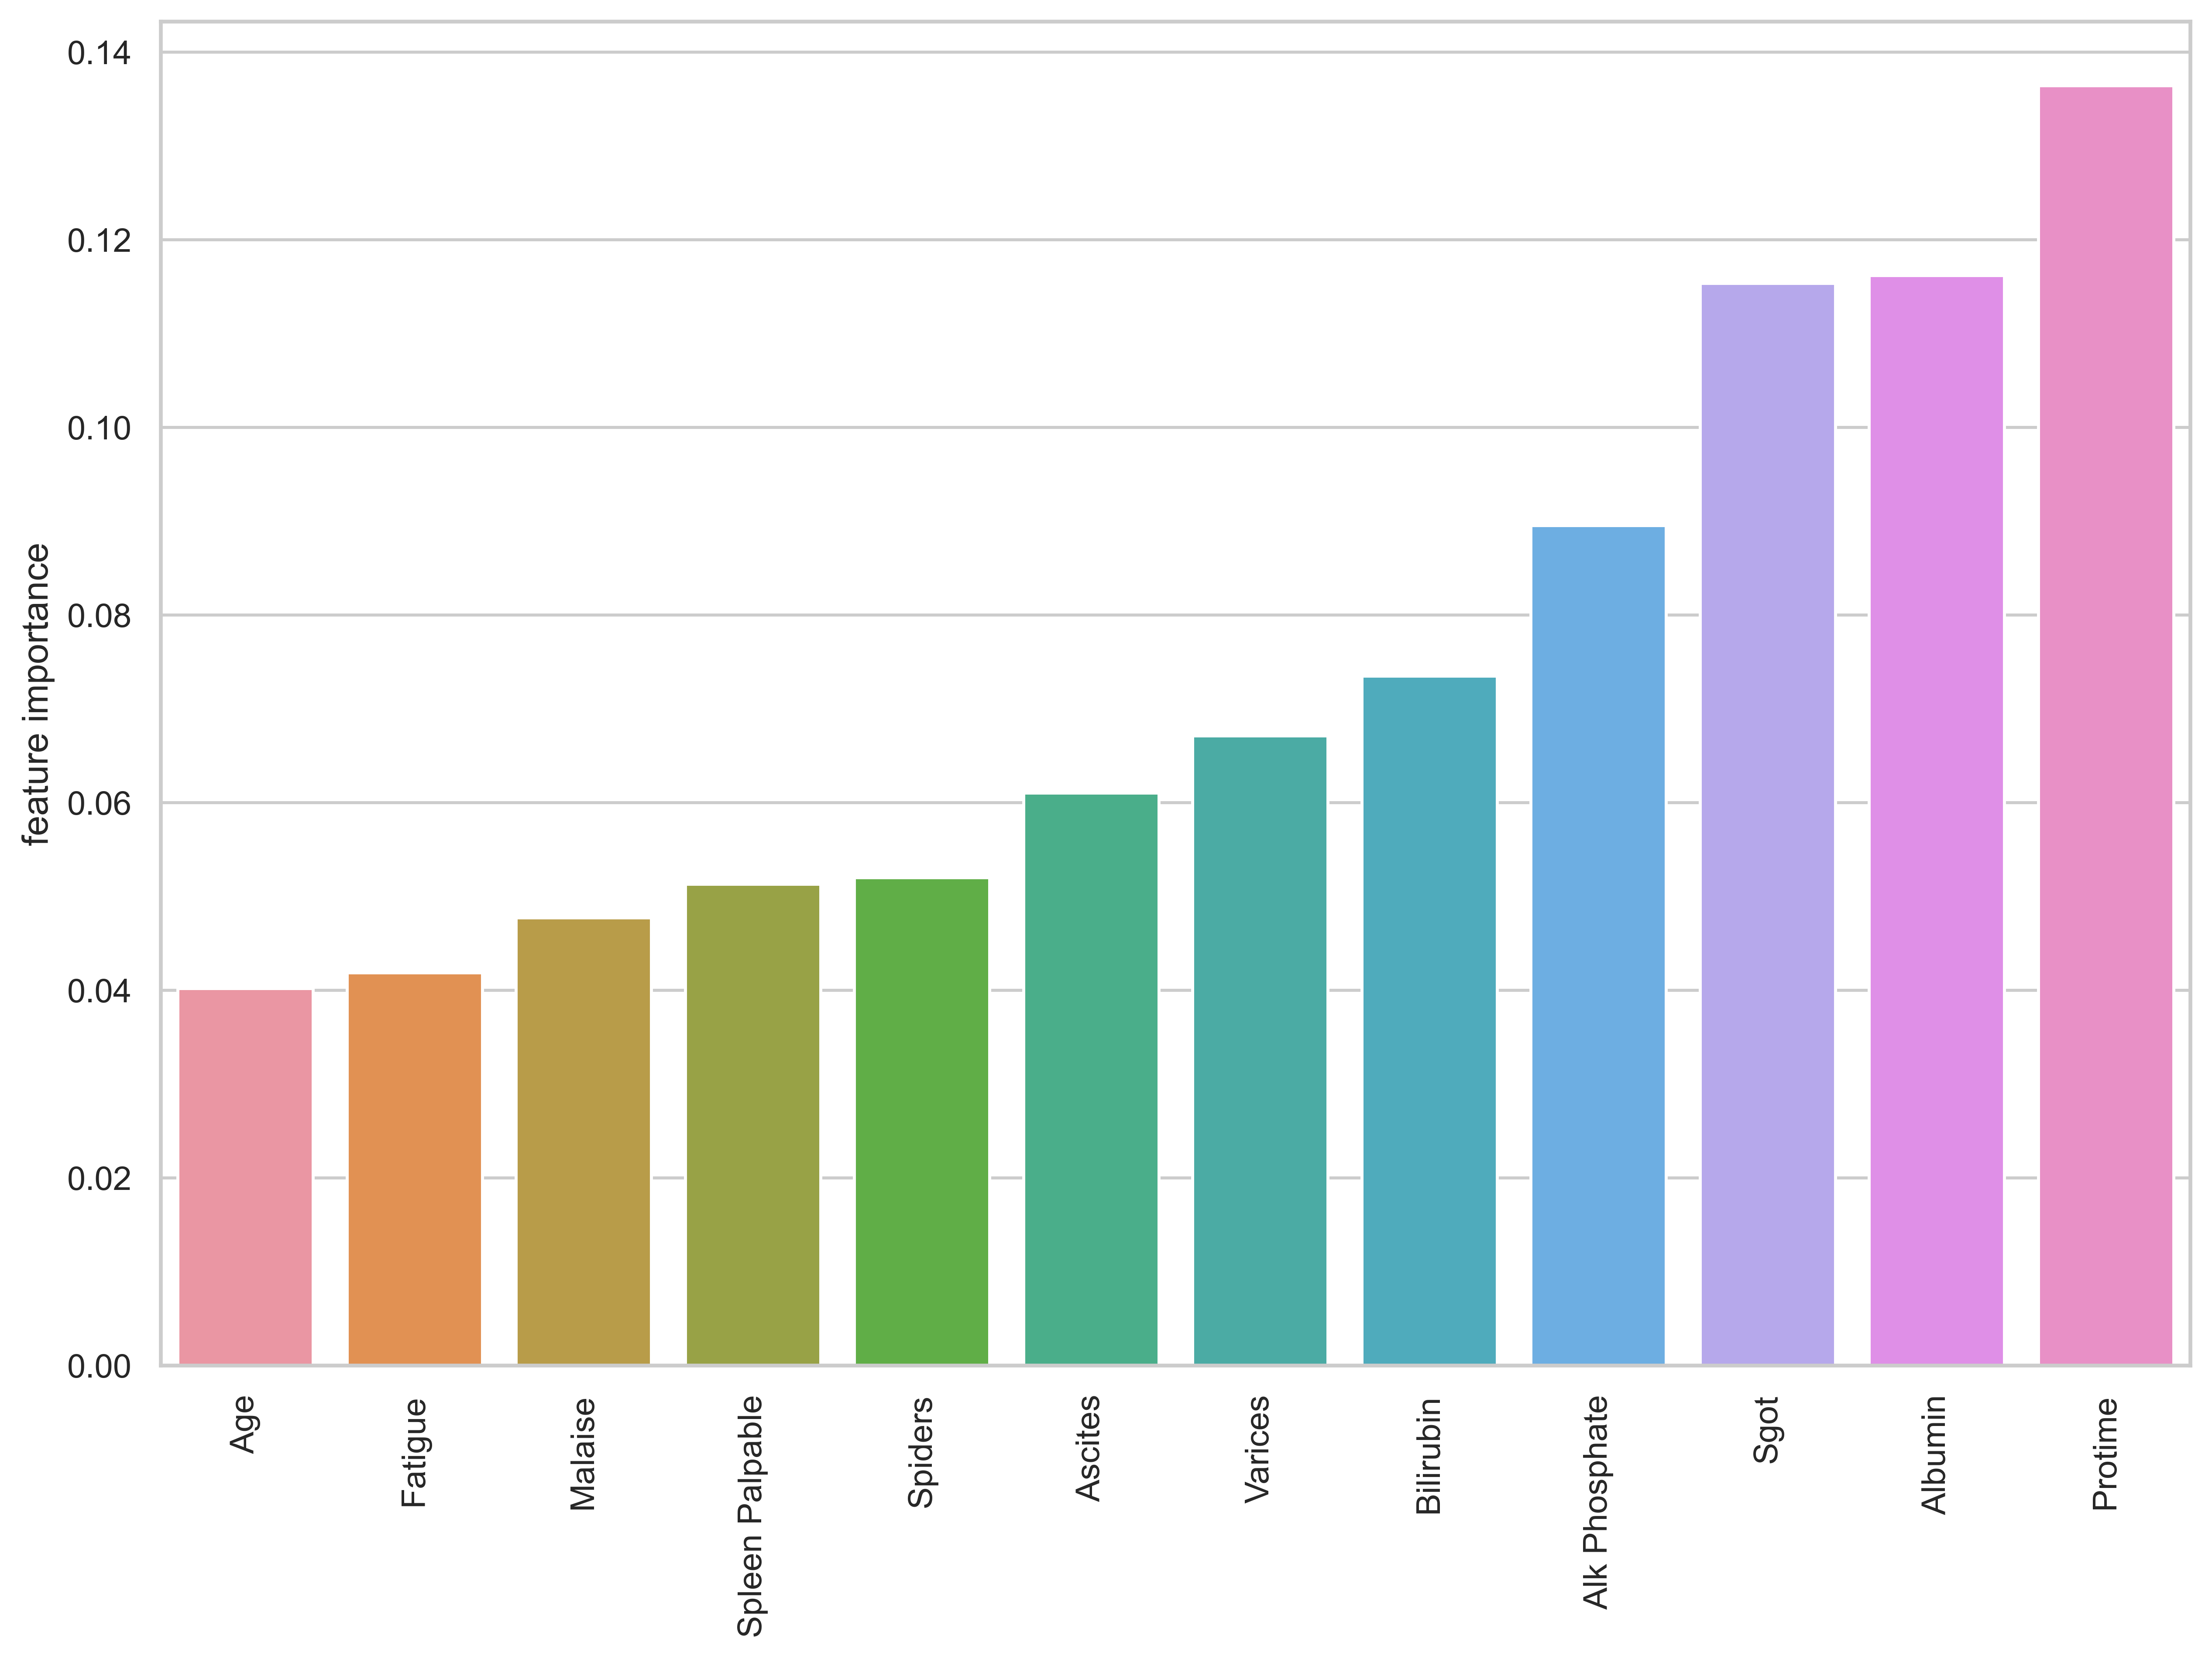

In [34]:
plt.figure(figsize=(12,8),dpi=(500))
sns.barplot(data=b,x=imp_feature.index,y='feature importance')
plt.xticks(rotation=90)
plt.show()

In [35]:
X=X[['Spleen Palpable', 'Fatigue', 'Varices', 'Sgot', 'Alk Phosphate', 'Age',
       'Malaise', 'Spiders', 'Protime', 'Ascites', 'Bilirubin', 'Albumin']]

In [36]:
import imblearn
from imblearn.over_sampling import SMOTE

ros = SMOTE()  # You need to add parentheses to create an instance
X_oversample, y_oversample = ros.fit_resample(X, y)

print(X_oversample.shape)
print(y_oversample.shape)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_oversample,y_oversample,random_state=1,test_size=0.2)

(246, 12)
(246,)


In [37]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.86
train accuracy: 1.0
********************
0.832258064516129
********************
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.85      0.88      0.86        25

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50

********************
86.0% Accurate


In [39]:
X_train

,Spleen Palpable,Fatigue,Varices,Sgot,Alk Phosphate,Age,Malaise,Spiders,Protime,Ascites,Bilirubin,Albumin
169,2,1,1,156.177560,116.214866,49,1,1,37.168303,1,4.409341,2.967293
159,2,1,1,22.785548,85.041623,46,1,1,65.846820,1,1.975491,4.157110
180,1,1,2,58.000000,85.000000,58,1,1,61.000000,2,1.000000,4.000000
147,2,1,2,528.000000,109.000000,70,1,2,35.000000,2,1.700000,2.800000
150,2,1,1,242.000000,85.000000,46,1,1,50.000000,1,7.600000,3.300000
...,...,...,...,...,...,...,...,...,...,...,...,...
137,2,2,1,140.000000,130.000000,38,2,1,56.000000,2,1.600000,3.500000
72,2,1,2,271.000000,76.000000,51,1,2,61.000000,2,0.900000,4.400000
140,2,1,1,60.000000,295.000000,36,1,1,61.000000,2,1.700000,2.700000
235,1,1,1,44.583815,131.611340,35,1,1,61.000000,1,1.404170,2.663887


In [40]:
#save the model
import pickle
model = rfc  # Your machine learning model object
file_path = 'Hepatitis.pkl'  # Path to the file where you want to save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)


In [41]:
# load the model
import pickle
file_path = 'Hepatitis.pkl'  # Path to the saved model file

with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [42]:
loaded_model.predict([[1,	1,	1	,97.392515,	63.869626,	36,	1,	1,	44.044386,	1,	2.221845,	3.173925]])

d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [43]:
loaded_model.predict([[1,	1,	2,	68.000000	,150.000000	,20,	1,	1,	61.000000,	2,	2.300000,	3.900000]])

# level 0

d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [44]:
#Spleen Palpable,Fatigue,Varices,Sgot,Alk Phosphate,Age,Malaise,Spiders,Protime,Ascites,Bilirubin,Albumin

loaded_model.predict([[2,2,2,18,85,30,2,2,61,2,1,4 ]])#0


d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [45]:
loaded_model.predict([[1,1,2,58,85,51,2,1,61,2,1,4 ]]) #1


d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

This model with grid search has performed slightly better than previous model with 95% accuracy 

**Thank you!**